In [130]:
import create_r3d_functions as c3d

# See below on c5d
# length of side of grid is 7.24 AU
# the star is within 1au and 2 au approximately
# cell size is 0.023 AU
c3d.create_grid(7.24,20,[4,3,2,1])



Creating amr_grid with octree refinement.
Length of total side of whole grid: 7.24 AU
Number of base cells along one side of the grid: 20
Distances to refinement limits from centrum: [4, 3, 2, 1] AU
Number refinements: 4
Size of base cell: 0.362 AU
Child cell size 1: 0.181 AU
Child cell size 2: 0.0905 AU
Child cell size 3: 0.04525 AU
Child cell size 4: 0.022625 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.



In [2]:
from bhmie.makedustopac import *

compute_opac_mie()



In [2]:
import analyze_r3d_functions as a3d
import numpy as np

wavelengths,nwave = a3d.load_wavelengthgrid()

print(
    np.array([
        wavelength*1e-4 for wavelength in wavelengths
    ])
)

[1.00000000e-05 1.10520985e-05 1.22148882e-05 1.35000147e-05
 1.49203493e-05 1.64901170e-05 1.82250398e-05 2.01424935e-05
 2.22616822e-05 2.46038305e-05 2.71923959e-05 3.00533038e-05
 3.32152074e-05 3.67097745e-05 4.05720044e-05 4.48405790e-05
 4.95582496e-05 5.47722657e-05 6.05348477e-05 6.69037100e-05
 7.39426394e-05 8.17221335e-05 9.03201070e-05 9.98226721e-05
 1.10325001e-04 1.21932277e-04 1.34760754e-04 1.48938913e-04
 1.64608754e-04 1.81927217e-04 2.01067752e-04 2.22222061e-04
 2.45602011e-04 2.71441762e-04 3.00000109e-04 3.31563076e-04
 3.66446778e-04 4.05000589e-04 4.47610641e-04 4.94703690e-04
 5.46751392e-04 6.04275025e-04 6.67850710e-04 7.38115184e-04
 8.15772173e-04 9.01599442e-04 9.96456586e-04 1.10129364e-03
 1.21716057e-03 1.34521786e-03 1.48674803e-03 1.64316857e-03
 1.81604609e-03 2.00711203e-03 2.21827999e-03 2.45166490e-03
 2.70960420e-03 2.99468125e-03 3.30975122e-03 3.65796965e-03
 4.04282410e-03 4.46816902e-03 4.93826442e-03 5.45781849e-03
 6.03203476e-03 6.666664

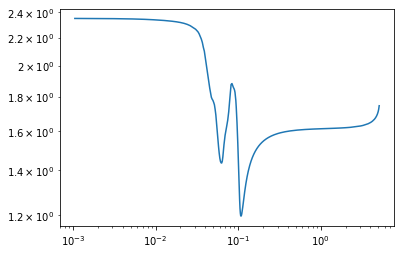

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mg2sio4 = np.loadtxt('../bhmie/lnk/mg2sio4.lnk',delimiter=' ')

plt.plot(1/mg2sio4[:,0],mg2sio4[:,1])
plt.xscale('log')
plt.yscale('log')





In [1]:
import opacity_r3d_functions as o3d


o3d.create_kappaabs(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,0.13,0.17,0.22,0.28,0.36,0.46,0.60,0.77,1.00]
)

För proof of concept-koden:

Använd dessa agrainum:

Avrunda till 2 decimaler

agrain      range

0.10   0.074 - 0.135

0.13   0.096 - 0.175

0.17   0.129 - 0.229

0.22   0.163 - 0.297

0.28   0.207 - 0.378

0.36   0.267 - 0.486

0.46   0.341 - 0.621

0.60   0.444 - 0.810

0.77   0.570 - 1.039

1.00   0.741 - 1.350

In [1]:
import analyze_r3d_functions as a3d
import create_r3d_functions as c3d


c3d.create_spheredensity(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,1.00]    
)


Writing dust_density.inp
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.34480268109295337 0.1 0
0.3696845502136472 0.1 0
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.33166247903553997 0.1 0
0.30368111930480995 0.1 0
0.2886751345948129 0.1 0
0.2886751345948129 0.1 0
0.30368111930480995 0.1 0
0.33166247903553997 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.30368111930480995 0.1 0
0.2728450923957484 0.1 0
0.2560381915956203 0.1 0
0.2560381915956203 0.1 0
0.2728450923957484 0.1 0
0.30368111930480995 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886751345948129 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886

# co5bold data - anteckningar

- i teststjärnan,


    ['Z'][0][0]

    [7], 10 tid i sekunder

    [13] - time step number

    [16], [19], [22] - cellcentrumkoordinater i cm

    [25],28,31     - cellboundary coords i cm

     34 - densitet i g/cm3! 317**3 antal celler!

     37 - internal energy erg/g - gör om till temperaturer? E=nkT? Knappast ideellt men en början

- teststar['EOS'][0][0][0] - är 317**3 (innehåller 2 arrayer-arrayer)

    Nästa steg [0] har 317**2

    Nästa har 317. Så det är nåt värde per cell

    Alla är i stolreken 1e-4

> Kolla manualen efter EOS
    
- teststar['OPA']... - opaciteter, kappa skrivs i infon - vll jag ha - hitta unique här och se om du kan minska ner till ett tiotal kappa

- ['PAR'] - har info om själva beräkningstid etc, inställningar



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
teststar = teststar['ful']

# Dict-columns
print(teststar.dtype.names)

#print(teststar['ful']['PAR'][0])
# Info on model run, stellar initial properties

#print(teststar['Z'])

# Probably grid sizes
#print(teststar['Z'][0][0][4])

# Total time(?)
#print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")

# Coordinates of one grid direction
#print(teststar['Z'][0][0][16][0][0]) #  -5.4185920e+13 - 5.4185844e+13  b'cm', b'x1 coordinates of cell

# XYZ-cell center coordinates in centimeters
print(np.size(teststar['Z'][0][0][16]))
print(np.size(teststar['Z'][0][0][19]))
print(np.size(teststar['Z'][0][0][22]))
print(np.size(teststar['Z'][0][0][25]))


ngrid = np.size(teststar['Z'][0][0][16])

gridx = []
gridy = []
gridz = []

for nn in range(ngrid):
    gridx.append(teststar['Z'][0][0][16][0][0][nn]/AUcm)
    gridy.append(teststar['Z'][0][0][19][0][nn][0]/AUcm)
    gridz.append(teststar['Z'][0][0][22][nn][0][0]/AUcm)

gridcournx = []
gridcourny = []
gridcournz = []

for nn in range(ngrid+1):
    gridcournx.append(teststar['Z'][0][0][25][0][0][nn]/AUcm)
    gridcourny.append(teststar['Z'][0][0][28][0][nn][0]/AUcm)
    gridcournz.append(teststar['Z'][0][0][31][nn][0][0]/AUcm)


('TYPE', 'HEAD', 'DATASET_ID', 'DATASET_ID__UNIT', 'DATASET_ID__NAME', 'MODELTIME', 'MODELTIME__UNIT', 'MODELTIME__NAME', 'MODELTIME_DB', 'MODELTIME_DB__UNIT', 'MODELTIME_DB__NAME', 'MODELITIME', 'MODELITIME__UNIT', 'MODELITIME__NAME', 'DTIME', 'DTIME__UNIT', 'DTIME__NAME', 'TIME_OUT_FULL_LAST', 'TIME_OUT_FULL_LAST__UNIT', 'TIME_OUT_FULL_LAST__NAME', 'TIME_OUT_MEAN_LAST', 'TIME_OUT_MEAN_LAST__UNIT', 'TIME_OUT_MEAN_LAST__NAME', 'Z', 'EOS', 'OPA', 'PAR')
317
317
317
318


In [3]:
teststar['Z'][0][0][22][2][0][0]/AUcm

-3.5762521459506145

Max difference between cell sizes: 5.607433254464778e-07
Mean cellsize: 0.022924646491984432


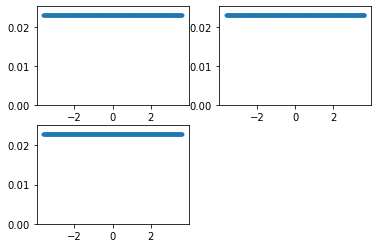

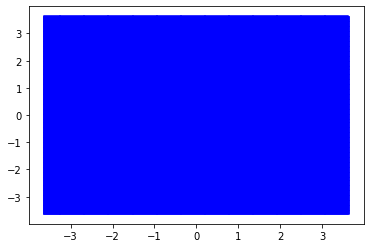

In [84]:

ngrid = np.size(gridx)

# Cell sizes
#teststar['Z'][0][0][25]))
#teststar['Z'][0][0][28]))
#teststar['Z'][0][0][31]))

#import create_r3d_functions as a3d


#> översätta grids: Jag har R,x,y,z-koordinater för alla celler för mina grids.
#    från co5bold har jag hörnen och avstånd från mitten av vardera axel
#    0. gör ett grid som har motsvarande upplösning och storlek som co5bold
#    1. gör en likadan lista med R,x,y,z-koordinater för alla celler
#    2. leta upp vilka co5boldceller motsvarar mina celler
#    3. spara rätt densiteter, temperaturer, absorptioner i min lista


nx,ny,nz = 0,0,0
cellsizesx = []
cellsizesy = []
cellsizesz = []

for nn in range(ngrid):

    cellsizesx.append(
        (teststar['Z'][0][0][25][0][0][nn+1] - teststar['Z'][0][0][25][0][0][nn])/AUcm
    )
    cellsizesy.append(
        (teststar['Z'][0][0][28][0][nn+1] - teststar['Z'][0][0][28][0][nn])[0]/AUcm
    )
    cellsizesz.append(
        (teststar['Z'][0][0][31][nn+1] - teststar['Z'][0][0][31][nn])[0][0]/AUcm
    )


plt.figure('gridsize')
plt.subplot(2,2,1)
plt.plot(gridx,cellsizesx,'.')
plt.ylim(0,np.max(cellsizesx)*(1.1))

plt.subplot(2,2,2)
plt.plot(gridy,cellsizesy,'.')
plt.ylim(0,np.max(cellsizesy)*(1.1))

plt.subplot(2,2,3)
plt.plot(gridz,cellsizesz,'.')
plt.ylim(0,np.max(cellsizesz)*(1.1))


print(f'Max difference between cell sizes: {np.max(np.diff(cellsizesx))}')
print(f'Mean cellsize: {np.mean(cellsizesx)}')

plt.figure('grid')
for nn in range(ngrid):
    plt.plot([gridcournx[nn],gridcournx[nn]],[gridcourny[0],gridcourny[-1]],'b')
    plt.plot([gridcournx[0],gridcournx[-1]],[gridcourny[nn],gridcourny[nn]],'b')



#print(np.size(teststar['EOS'][0][0][0][0][0]))


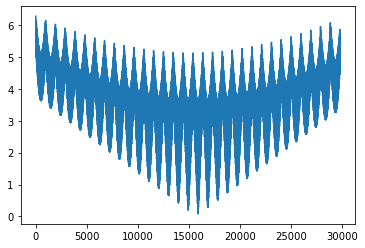

In [20]:
import matplotlib.pyplot as plt

AUcm = 1.49598e13 # cm

radialgrid = []

for nx in range(int(ngrid/10)):
    for ny in range(int(ngrid/10)):
        for nz in range(int(ngrid/10)):
            radialgrid.append(np.sqrt(gridx[10*nx]**2 + gridy[10*ny]**2 + gridz[10*nz]**2)/AUcm)


plt.plot(radialgrid)

"""    
plt.figure('x-y')
plt.plot(gridx[nn]/AUcm,gridy[nn]/AUcm,'b.')
plt.figure('x-z')
plt.plot(gridx[nn]/AUcm,gridz[nn]/AUcm,'r.')
""";



In [38]:
# Use this for grid-extracting functions!

#  Densities: teststar['Z'][0][0][34][nx][ny][nz]

# Grid:
#    gridx.append(teststar['Z'][0][0][16][0][0][nn]/AUcm)
#    gridy.append(teststar['Z'][0][0][19][0][nn][0]/AUcm)
#    gridz.append(teststar['Z'][0][0][22][nn][0][0]/AUcm)

import create_r3d_functions as c3d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Load sav-file
teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')

# Extract data
teststar = teststar['ful']

# Get number of gridcells from co5bold data
nc5dedge = np.size(teststar['Z'][0][0][16])
nc5d = nc5dedge**3

cobolddensities = np.zeros(nc5d)
cobolddistances = np.zeros((nc5d,4))
nx,ny,nz = 0,0,0

for nn in range(nc5d):
    # Save densities
    cobolddensities[nn] = teststar['Z'][0][0][34][nx][ny][nz]

    # Save x,y,z distances in cm
    cobolddistances[nn,1] = teststar['Z'][0][0][16][0][0][nx]
    cobolddistances[nn,2] = teststar['Z'][0][0][19][0][ny][0]
    cobolddistances[nn,3] = teststar['Z'][0][0][22][nz][0][0]
    
    # Save radial distances in cm
    cobolddistances[nn,0] = np.sqrt(
        cobolddistances[nn,1]**2 + cobolddistances[nn,2]**2 + cobolddistances[nn,3]**2
    )

    # Save cellsizes < do I need this?

    # Move coordinates
    nx,ny,nz = c3d.movecoordinates(nc5dedge,nx,ny,nz)



(-1e-09, 3e-08)

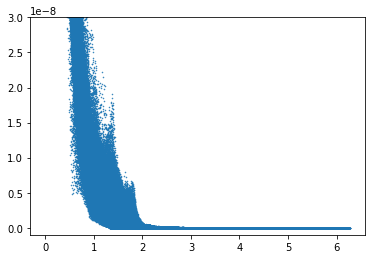

In [42]:
import matplotlib.pyplot as plt

plt.figure('co5bold densities')
plt.plot(cobolddistances[:,0]/AUcm,cobolddensities,'.',markersize=1)


In [128]:
np.max(cobolddistances[:,1])/AUcm *2

7.244193676018129

In [134]:
import numpy as np
import analyze_r3d_functions as a3d

# Load r3d-grid
griddistances = a3d.load_griddistances()
nr3d = np.size(griddistances[:,0])





In [147]:

#plt.plot(griddistances[:,0])

# Loop through grids and extract cobolddensities to my grid

# loop over nr3d
# loop over nc5d


# Declare array with r3d cell number corresponding to c5d cells
#comparisonarray = np.zeros(nc5d)

Ntest = 1000
comparisonarray = np.zeros(nr3d)


# is this faster?
# for c5dx,c5dy,c5dz in cobolddistances[:,1],cobolddistances[:,2],cobolddistances[:,3]

#xlist,ylist,zlist = [],[],[]

densityarray = np.zeros(nr3d)



#for nc in range(nc5d):

for nc in range(Ntest):

    # Compare x,y,z-coords, ie
    # Compare
    # (griddistances[:,1],griddistances[:,2],griddistances[:,3])
    # with
    # (cobolddistances[nc,1],cobolddistances[nc,2],cobolddistances[nc,3])


    # check each cell of nc5d, which cell is it closest to in r3d?
    
    # (skip sqrt to save time)

    nr = np.argmin(
        (griddistances[:,1] - cobolddistances[nc,1])**2 + \
        (griddistances[:,2] - cobolddistances[nc,2])**2 + \
        (griddistances[:,3] - cobolddistances[nc,3])**2
    )


    # Save number of c5dcells per r3dcell
    comparisonarray[nr] += 1

    # Save densities
    densityarray[nr] += cobolddensities[nc]

# Average the densities by number of c5dcells per r3dcells
densityarray = densityarray / comparisonarray


#np.unique(comparisonarray, return_counts=True)


#print(np.unique(xlist))






The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


UsageError: Line magic function `%%cython` not found.


In [1]:
import analyze_co5bold_functions as a5d
import numpy as np
import analyze_r3d_functions as a3d

# Load r3d-grid
r3dgrid = a3d.load_griddistances()

# load c5d-grid
c5dgrid,c5ddensities = a5d.load_co5boldgrid()

# translate to r3d densities
r3ddensities = a5d.load_co5bolddensity(c5dgrid,c5ddensities,r3dgrid)


KeyboardInterrupt: 

In [8]:
# translate to r3d densities
Ntest = 10000
r3ddensities = a5d.load_co5bolddensity(c5dgrid[:Ntest,:],c5ddensities[:Ntest],r3dgrid)

/home/joachim/exwings/exwings-codes/analyze_co5bold_functions.py:109: RuntimeWarning: invalid value encountered in true_divide
  


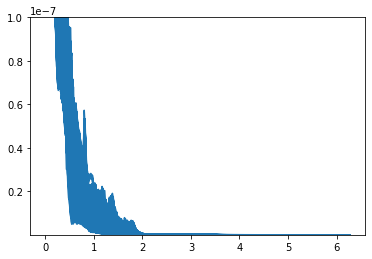

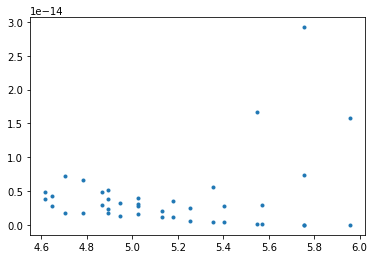

In [17]:
import matplotlib.pyplot as plt

plt.figure('c5d')
plt.plot(c5dgrid[:,0]/1.49598e13,c5ddensities)


plt.figure('c5d in r3d')
plt.plot(r3dgrid[:,0]/1.49598e13,r3ddensities,'.')

In [5]:
# Check number of hours to run all grid
#print(np.size(comparisonarray) / np.size(np.where(comparisonarray != 0)[0]) * 90 / 60)

print(f'{np.size(c5dgrid[:,0])/np.size(c5dgrid[:Ntest,0]) * (60 + 23)/3600:.2f} hours')

73.44 hours


In [1]:
import analyze_co5bold_functions as a5d

c5dgrid = a5d.load_co5boldgrid()

In [2]:
import analyze_r3d_functions as a3d
import numpy as np

# Load r3d-grid
r3dgrid = a3d.load_griddistances()
nr3d = np.size(r3dgrid[:,0])

print(np.shape(r3dgrid))


(810872, 4)


In [3]:
Ntest = 10000
r3dindeces = []
for nc in range(Ntest):

    c5dx = c5dgrid[nc,1]
    c5dy = c5dgrid[nc,1]
    c5dz = c5dgrid[nc,1]

    r3dindeces.append(a5d.compare_grids(c5dx,c5dy,c5dz,r3dgrid))


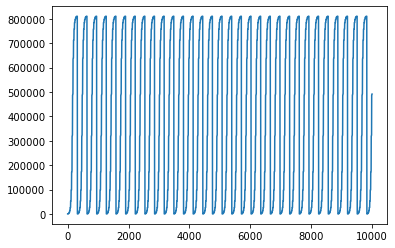

In [4]:
import matplotlib.pyplot as plt
plt.plot(r3dindeces)

In [ ]:

# My r3dgrid

import create_r3d_functions as c3d
import analyze_r3d_functions as a3d

# See below on c5d
# length of side of grid is 7.24 AU
# the star is within 1au and 2 au approximately
# cell size is 0.023 AU
c3d.create_grid(7.24,20,[4,3,2,1])
r3dgrid = a3d.load_griddistances()

In [1]:

import create_r3d_functions as c3d
import analyze_r3d_functions as a3d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Load sav-file
c5dstar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')

# Extract data
c5dstar = c5dstar['ful']

# Get number of gridcells from co5bold data
nc5dedge = np.size(c5dstar['Z'][0][0][16])
nc5d = nc5dedge**3

# Define new grid settings

# Extract lists of cell sizes (MIGHT NOT BE REQUIRED!)
cellsizesx = []
cellsizesy = []
cellsizesz = []

for nn in range(nc5dedge):
    cellsizesx.append(
        (c5dstar['Z'][0][0][25][0][0][nn+1] - c5dstar['Z'][0][0][25][0][0][nn])
    )
    cellsizesy.append(
        (c5dstar['Z'][0][0][28][0][nn+1] - c5dstar['Z'][0][0][28][0][nn])[0]
    )
    cellsizesz.append(
        (c5dstar['Z'][0][0][31][nn+1] - c5dstar['Z'][0][0][31][nn])[0][0]
    )

# Use minimum sizes to define new grid
gridcell4 = (min(cellsizesx) + min(cellsizesy) + min(cellsizesz))/3

# Save as c5dcellsize for later
c5dcellsize = gridcell4

# Basecell is then (TODO change 4 to nrefines and make nb refinments a choice)
gridcell0 = gridcell4 * 2**4

# Grid edge size in cm (ie size of side of spatial grid cube)
# gridedge = c5dstar['Z'][0][0][16][0][0][:].max() - c5dstar['Z'][0][0][16][0][0][:].min()
gridedge = gridcell4 * len(cellsizesx)

# Define a list of distances to refinements based on maximum radial distances
# TODO reduce hard coding on this
maxradius = np.sqrt(3)*gridedge*0.5
refinementlist = [0.6*maxradius, 0.5*maxradius, 0.4*maxradius, 0.3*maxradius]
reflistau = [r/AUcm for r in refinementlist]

# Number of base cells on once side
nxyz = gridedge / gridcell0

print('Settings before creation of grid')
print(gridedge/AUcm)
print(nxyz)
print(gridcell4/AUcm)
print('')

# Create R3D grid
c3d.create_grid(gridedge/AUcm, nxyz, reflistau, savegrid=True)



Settings before creation of grid
7.267005835983904
19.8125
0.02292430863086405

Creating amr_grid with octree refinement.
Final length of total side of whole grid: 7.335778761876496 AU
Number of base cells along one side of the grid: 20
Distances to refinement limits from centrum: [3.776046998047099, 3.146705831705916, 2.5173646653647332, 1.8880234990235496] AU
Number refinements: 4
Size of base cell: 0.3667889380938248 AU
Child cell size 1: 0.1833944690469124 AU
Child cell size 2: 0.0916972345234562 AU
Child cell size 3: 0.0458486172617281 AU
Child cell size 4: 0.02292430863086405 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.



In [3]:
import analyze_co5bold_functions as a5d
import numpy as np
AUcm = 1.49598e13 # cm

c5dgrid = a5d.load_grid_coordinates()
c5dedge = np.size(c5dgrid[:,0])

print(c5dgrid[0,:]/AUcm)
print(c5dedge)



[-3.62210188 -3.62210188 -3.62210188]
317


In [4]:
import analyze_co5bold_functions as a5d
import numpy as np
AUcm = 1.49598e13 # cm

c5dcellsize,c5dcourners = a5d.load_grid_cellsizes()

print(np.max(c5dcourners[:,0])/AUcm)
print(c5dcellsize/AUcm)


3.633553945634567
0.02292430863086405


In [2]:
import analyze_co5bold_functions as a5d
import numpy as np

c5dstar_densities = a5d.load_star_densities()

print(np.shape(c5dstar_densities))



(317, 317, 317)


In [33]:
import create_r3d_functions as c3d
import analyze_r3d_functions as a3d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Create an r3d-grid
# 6AU side (3AU, the star seems to end at 2AU for this test)
# nxyz is 
# c5dcellsize

# TODO
# HÄR ÄR JAG
# fixa ett grid lättare grid och testa koden nedan (ladda in c5d-grejer också)
# ändra så att koden använder np-arrayerna som mina funktioner skapar
# nyttja sen cython till funktionen för att få till en snabbare kod

c3d.create_grid(gridedge/AUcm, nxyz, reflistau, savegrid=True)








# Load sav-file
c5dstar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')

# Extract data
c5dstar = c5dstar['ful']

# Get number of gridcells from co5bold data
nc5dedge = np.size(c5dstar['Z'][0][0][16])




# Extract final grid props
nxyz,nrefines,nleafs,nbranch,gridedge = a3d.load_gridprops()
r3ddistances = a3d.load_griddistances()
r3dcellsizes = a3d.load_cellsizes()

# Declare stuff for the loops
stararray = np.zeros(nleafs)
#nx,ny,nz = 0,0,0

# Matrix with info on if c5d cells are done or not
c5dcell_list = np.zeros((nc5dedge,nc5dedge,nc5dedge))


# For tests only
testgriddistances = np.zeros(nleafs)

counter = 0
countc5d = 0

# Loop over r3d cell list
for nr3d in range(nleafs):
#for nr3d in range(100):

    # Check cell size ratio between current r3d cell and c5d cells (constant size)
    #sizeratio = int(r3dcellsizes[nr3d]/c5dcellsize)

    # Det jag borde göra är att 1, kolla detta
    # Check so that the c5dcell is inside the current r3dcell 
    r3dxrange = [r3ddistances[nr3d,1]-0.5*r3dcellsizes[nr3d],r3ddistances[nr3d,1]+0.5*r3dcellsizes[nr3d]]
    r3dyrange = [r3ddistances[nr3d,2]-0.5*r3dcellsizes[nr3d],r3ddistances[nr3d,2]+0.5*r3dcellsizes[nr3d]]
    r3dzrange = [r3ddistances[nr3d,3]-0.5*r3dcellsizes[nr3d],r3ddistances[nr3d,3]+0.5*r3dcellsizes[nr3d]]

    # 2 nyttja denna range för att ta fram vilka c5dceller jag ska gå igenom.
    
    
    for nx in range(nc5dedge):
        c5dx = c5dstar['Z'][0][0][16][0][0][nx]
        if r3dxrange[0] <= c5dx <= r3dxrange[1]:

            for ny in range(nc5dedge):
                c5dy = c5dstar['Z'][0][0][19][0][ny][0]
                if r3dyrange[0] <= c5dy <= r3dyrange[1]:

                    for nz in range(nc5dedge):
                        c5dz = c5dstar['Z'][0][0][22][nz][0][0]
                        if r3dzrange[0] <= c5dz <= r3dzrange[1]:

                            # Check so that c5d cell is not already looked at
                            if c5dcell_list[nx,ny,nz] == 0:

                                counter += 1
                                countc5d += 1

                                # Add star densities
                                stararray[nr3d] += c5dstar['Z'][0][0][34][nx][ny][nz]

                                # Mark this cell
                                c5dcell_list[nx,ny,nz] = 1

                                # TODO
                                # Here i can save more things, 
                                # like the dust, temperatures etc
    
    # Average density by number of c5dcells inside the current r3dcell
    # Could also use a counter in the triple loop
    if counter != 0:
        stararray[nr3d] /= counter
        counter = 0

    # TODO
    # write dust_density_star.inp here


"""
if r3dxrange[0] <= c5dx <= r3dxrange[1] and \
r3dyrange[0] <= c5dy <= r3dyrange[1] and \
r3dzrange[0] <= c5dz <= r3dzrange[1]:

    # Make sure that the cells fit within the whole grid
    if nx+sizeratio < nc5dedge and ny+sizeratio < nc5dedge and nz+sizeratio < nc5dedge:
        # Properties are kept at zero otherwise

        # Loop through the c5d cells within the r3dcell
        for nnx in range(sizeratio):
            for nny in range(sizeratio):
                for nnz in range(sizeratio):

                    # Add cell numbers to initial cell number
                    nnnx = nnx + nx
                    nnny = nny + ny
                    nnnz = nnz + nz

                    # Add densities
                    densityarray[nr3d] += c5dstar['Z'][0][0][34][nnnx][nnny][nnnz]

                    # Mark this cell
                    c5dcell_list[nnnx,nnny,nnnz] = 1
        
        # Average density by number of c5d cells inside r3d cell
        densityarray[nr3d] /= sizeratio**3

    # For tests only, save griddistances (this won't be correct since it's
    # in the courner of each r3d cell but whatev)
    testgriddistances[nr3d] = np.sqrt(c5dx*c5dx + c5dy*c5dy + c5dz*c5dz)
""";


# kolla hur mycket större r3dcellen är än c5dcellerna med kvoten r3dcellsize/c5dcellsize = Ncells
#
# kolla vilka c5d-celler är inom r3d-cellen (dvs r3d-coords, +/- 0.5*r3dcellsize) mha den kvoten
# det ska komma automatiskt via att jag har 3st arrayer, 317 långa vardera, plocka ut alla xyz som
# ligger inom r3dcellen (behöver inte beräkna nåt sqrt(x**2 etc))
#
# 3 loopar i varandra, över xyz vardera, mot Ncells vilket är antal c5dceller per r3dceller
# summera densiteterna, och ta delat på Ncells**3
#
# sen går jag till nästa r3dcell, och loopar gneom de c5d-celler som finns inom den

# Kanske inte: lägg till en etta på vardera cellplats i min checklistematris
# ta nc5d += 1, den går gneom en lista med xyz-koordinater för c5d-cellerna
# alternativt, så använder jag c5dxyz-arrayerna och min checklistematris samt movecoord-grejen för xyz?





/tmp/ipykernel_19220/3398015660.py:58: RuntimeWarning: invalid value encountered in double_scalars
  densityarray[nr3d] /= counter


KeyboardInterrupt: 

In [35]:
nr3d/nleafs

0.2479871736413686

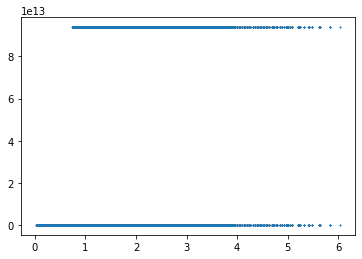

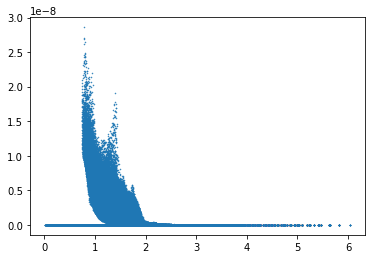

In [36]:
import matplotlib.pyplot as plt

griddistances = a3d.load_griddistances()

plt.figure('radial distances comparison')
plt.plot(griddistances[:,0]/AUcm,testgriddistances,'.',markersize=1)

plt.figure('density check')
plt.plot(griddistances[:,0]/AUcm,densityarray,'.',markersize=1)

In [58]:
# Extract final grid props
nxyz,nrefines,nleafs,nbranch,gridedge = a3d.load_gridprops()
r3ddistances = a3d.load_griddistances()
r3dcellsizes = a3d.load_cellsizes()

# Declare stuff for the loops
densityarray = np.zeros(nleafs)
nr3d = 0
nx,ny,nz = 0,0,0

# Matrix with info on if c5d cells are done or not
c5dcell_list = np.zeros((nc5dedge,nc5dedge,nc5dedge))


# For tests only
testgriddistances = np.zeros(nleafs)

# Daught cell order
# In 3-D
# (1,1,1) (2,1,1) (1,2,1) (2,2,1) (1,1,2) (2,1,2) (1,2,2) (2,2,2)
#  xyz,    x+1yz,  xy+1z,  x+1y+1z,  xyz+1, x+1yz+1, xy+1z+1, x+1y+1z+1

corrx = [0,1,0,1,0,1,0,1]
corry = [0,0,1,1,0,0,1,1]
corrz = [0,0,0,0,1,1,1,1]



# Loop through c5d cells
for nn in range(nc5d):

    # Check so that c5d cell is not already looked at
    if c5dcell_list[nx,ny,nz] == 0:

        # Extract coordinates
        c5dx = c5dstar['Z'][0][0][16][0][0][nx]
        c5dy = c5dstar['Z'][0][0][19][0][ny][0]
        c5dz = c5dstar['Z'][0][0][22][nz][0][0]

        radius = np.sqrt(c5dx*c5dx + c5dy*c5dy + c5dz*c5dz)

        # For tests only
        #print(c5dcell_list[nx,ny,nz])
        testgriddistances[nr3d] = radius/AUcm
        
        if radius < refinementlist[3]:

            # 4th refinement
            # Loop over all daughter cells within the next cell size
            for (cx,cy,cz) in zip(corrx,corry,corrz):

                # Save density
                densityarray[nr3d] = c5dstar['Z'][0][0][34][nx+cx][ny+cy][nz+cz]

                # Increase density array index
                nr3d += 1

                # Mark this cell
                c5dcell_list[nx+cx,ny+cy,nz+cz] = 1
        
        # For tests only
        else:
            c5dcell_list[nx,ny,nz] = 1
            nr3d += 1
        
        if nr3d == nleafs:
            print(f'Breaking at nn = {nn}, {int(nn/nc5d*100)} %\n')
            break

        """
        if refinementlist[3] <= radius < refinementlist[2]:

            # 3rd refinement
            # Loop over all daughter cells            
            for (childx2,childy2,childz2) in zip(corrx,corry,corrz):
                for (childx1,childy1,childz1) in zip(corrx,corry,corrz):
                    for (cx,cy,cz) in zip(corrx,corry,corrz):
                    
                        # Save density, average of 8 cells
                        densityarray[nr3d] += c5dstar['Z'][0][0][34][
                            nx+cx + childx1*2 + childx2*4][
                            ny+cy + childy1*2 + childx2*4][
                            nz+cz + childz1*2 + childx2*4]

                        # Mark cells with 1
                        c5dcell_list[
                            nx+cx + childx1*2 + childx2*4,
                            ny+cy + childy1*2 + childy2*4,
                            nz+cz + childz1*2 + childz2*4] = 1

                # Average density
                densityarray[nr3d] /= 8

                # Increase density array index
                nr3d += 1

        if radius < refinementlist[1] and radius >= refinementlist[2]:

            # 2nd refinement
            # Loop over all daughter cells (multiply by 4 because of the larger cell)

            for (childx,childy,childz) in zip(corrx,corry,corrz):
                for (cx,cy,cz) in zip(corrx,corry,corrz):

                    densityarray[nr3d] += c5dstar['Z'][0][0][34][
                    ][
                    ][
                    ]
                
                # Save density, average of 64 cells
                densityarray[nr3d] /= c5dstar['Z'][0][0][34][
                    (nx+cx)*4:(nx+cx)*4+4][
                    (ny+cy)*4:(ny+cy)*4+4][
                    (nz+cz)*4:(nz+cz)*4+4].sum()/64

                # Increase density array index
                nr3d += 1

                # Mark these cells
                c5dcell_list[
                    (nx+cx)*4:(nx+cx)*4+4,
                    (ny+cy)*4:(ny+cy)*4+4,
                    (nz+cz)*4:(nz+cz)*4+4] = 1

        if radius < refinementlist[0] and radius >= refinementlist[1]:

            # 1st refinement
            # Loop over all daughter cells (multiply by 8 because of the larger cell)
            for (cx,cy,cz) in zip(corrx,corry,corrz):

                # Save density, average of 512 cells
                densityarray[nr3d] = c5dstar['Z'][0][0][34][
                    (nx+cx)*8:(nx+cx)*8+8][
                    (ny+cy)*8:(ny+cy)*8+8][
                    (nz+cz)*8:(nz+cz)*8+8].sum()/512

                # Increase density array index
                nr3d += 1

                # Mark these cells
                c5dcell_list[
                    (nx+cx)*8:(nx+cx)*8+8,
                    (ny+cy)*8:(ny+cy)*8+8,
                    (nz+cz)*8:(nz+cz)*8+8] = 1

        if radius >= refinementlist[0]:

            # Non-refined cells
            # Loop over all daughter cells (multiply by 16 because of the larger cell)
            for (cx,cy,cz) in zip(corrx,corry,corrz):

                # Save density, average of 4096 cells
                densityarray[nr3d] = c5dstar['Z'][0][0][34][
                    (nx+cx)*16:(nx+cx)*16+16][
                    (ny+cy)*16:(ny+cy)*16+16][
                    (nz+cz)*16:(nz+cz)*16+16].sum()/4096

                # Increase density array index
                nr3d += 1

                # Mark these cells
                c5dcell_list[
                    (nx+cx)*16:(nx+cx)*16+16,
                    (ny+cy)*16:(ny+cy)*16+16,
                    (nz+cz)*16:(nz+cz)*16+16] = 1
        """
    
    # Move coordinates
    nx,ny,nz = c3d.movecoordinates(nc5dedge,nx,ny,nz)


Breaking at nn = 2842271, 8 %

